## Union de las 25 estaciones meteorologicas de barcelona

In [22]:
#Libraries
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
#Cargar de los csv de cada estacion como df
est1=pd.read_csv('../data/processed/df1_clima.csv')
est2=pd.read_csv('../data/processed/df2_clima.csv')
est3=pd.read_csv('../data/processed/df3_clima.csv')
est4=pd.read_csv('../data/processed/df4_clima.csv')
est5=pd.read_csv('../data/processed/df5_clima.csv')
est6=pd.read_csv('../data/processed/df6_clima.csv')
est7=pd.read_csv('../data/processed/df7_clima.csv')
est8=pd.read_csv('../data/processed/df8_clima.csv')
est9=pd.read_csv('../data/processed/df9_clima.csv')
est10=pd.read_csv('../data/processed/df10_clima.csv')
est11=pd.read_csv('../data/processed/df11_clima.csv')
est12=pd.read_csv('../data/processed/df12_clima.csv')
est13=pd.read_csv('../data/processed/df13_clima.csv')
est14=pd.read_csv('../data/processed/df14_clima.csv')
est15=pd.read_csv('../data/processed/df15_clima.csv')
est16=pd.read_csv('../data/processed/df16_clima.csv')
est17=pd.read_csv('../data/processed/df17_clima.csv')
est18=pd.read_csv('../data/processed/df18_clima.csv')
est19=pd.read_csv('../data/processed/df19_clima.csv')
est20=pd.read_csv('../data/processed/df20_clima.csv')
est21=pd.read_csv('../data/processed/df21_clima.csv')
est22=pd.read_csv('../data/processed/df22_clima.csv')
est23=pd.read_csv('../data/processed/df23_clima.csv')
est24=pd.read_csv('../data/processed/df24_clima.csv')
est25=pd.read_csv('../data/processed/df25_clima.csv')

df_list = [est1, est2, est3, est4, est5, est6, est7, est8, est9, est10, est11, est12, est13, est14, est15, est16, est17, est18, est19, est20, est21, est22, est23, est24, est25]
df_clima_total=[]

In [20]:
#Procesaremos todos los datos de cada estacion
#Temeperatura media total
#Velocidad del viento media total
#precipitaciones suma total
#Primero unimos todos los df
df_total = pd.concat(df_list, ignore_index=True)

# Transformamos de tipo objeto a timo fecha
df_total['fecha'] = pd.to_datetime(df_total['fecha'])
#Transformaremos el resto de datos a tipo int, los no numericos seran NAN
df_total['tmed'] = df_total['tmed'].str.replace(',','.')
df_total['tmed'] = pd.to_numeric(df_total['tmed'], errors='coerce')
df_total['prec'] = df_total['prec'].str.replace(',', '.')
df_total['prec'] = pd.to_numeric(df_total['prec'], errors='coerce')
df_total['velmedia'] = df_total['velmedia'].str.replace(',','.')
df_total['velmedia'] = pd.to_numeric(df_total['velmedia'], errors='coerce')
    # Agrupar por fecha y calcular la media de la temperatura y la velocidad del viento, y la suma de las precipitaciones
df_clima_total = df_total.groupby(df_total['fecha'].dt.date).agg({
    'tmed': 'mean',
    'prec': 'sum',
    'velmedia': 'mean'
}).reset_index()

In [21]:
df_clima_total

,fecha,tmed,prec,velmedia
0,2019-01-01,8.590909,0.0,1.417647
1,2019-01-02,6.617391,0.3,2.152941
2,2019-01-03,5.604348,0.1,1.676471
3,2019-01-04,5.004348,0.0,1.335294
4,2019-01-05,6.173913,0.0,2.247059
...,...,...,...,...
2092,2024-09-23,18.390476,19.9,2.052941
2093,2024-09-24,19.466667,0.2,1.935294
2094,2024-09-25,18.704762,0.0,2.235294
2095,2024-09-26,23.042857,0.0,3.058824


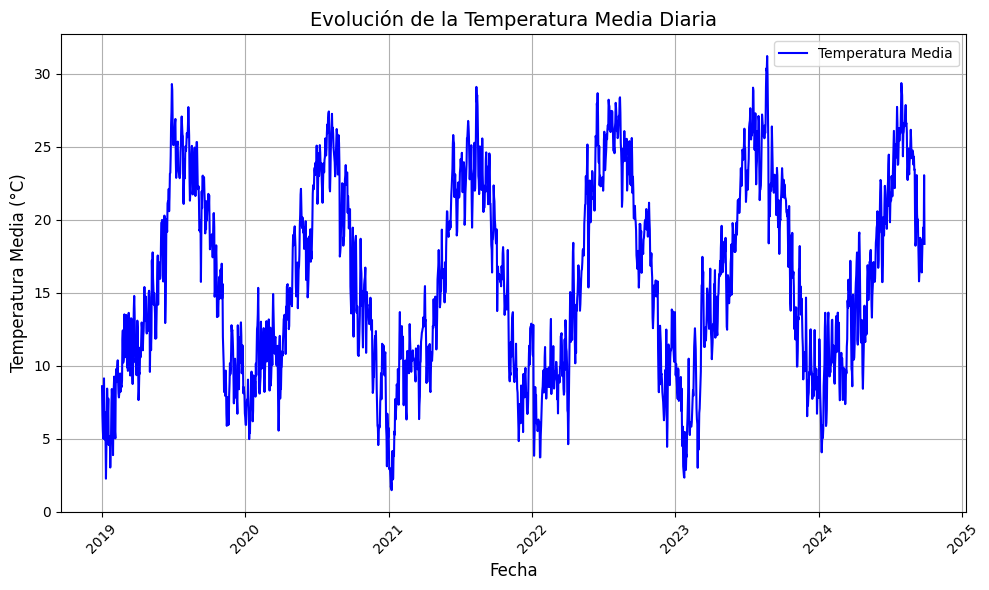

In [23]:
df_clima_total['fecha'] = pd.to_datetime(df_clima_total['fecha'])

# Crear la gráfica temporal
plt.figure(figsize=(10,6))
plt.plot(df_clima_total['fecha'], df_clima_total['tmed'], label='Temperatura Media', color='b')

# Personalizar el gráfico
plt.title('Evolución de la Temperatura Media Diaria', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Temperatura Media (°C)', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)  # Rotar las etiquetas de fechas si son muchas
plt.legend()

# Mostrar la gráfica
plt.tight_layout()
plt.show()

In [24]:
#Guardamos los datos en un CSV
df_clima_total.to_csv("../data/Final_Data/df_clima_total.csv", index = False)